In [32]:
print('Hello')

Hello


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('data/sulatto_fulldata2025_version2.csv', delimiter=";", index_col=None)

C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_9892\3465785326.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/sulatto_fulldata2025_version2.csv', delimiter=";", index_col=None)


In [35]:
df

,Material Type,End time,Route,Weight,Length,Thickness,Width,Grade,Quality Status,Seg No,...,CCM.MD. Level std_dev east Value,CCM.MD. Mold width Value,CCM.MIX. Concentration factor Value,CCM.STR. Speed - Mold avg Value,CCM.STR. Throughput Value,CCM.SLAB. Slab counter heat Value,CCM.SLAB. Slab counter sequence Value,HeatNo_in_Cast,SlabNo_in_Heat,CastNo
0,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,1,...,"12,50",1539.0,"0,000","0,50","1,18",1.0,1.0,2821,1,100.0
1,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,2,...,"12,50",1539.0,"0,000","0,54","1,28",1.0,1.0,2821,1,100.0
2,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,3,...,"12,50",1539.0,"0,000","0,56","1,33",1.0,1.0,2821,1,100.0
3,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,4,...,"12,50",1539.0,"0,000","0,57","1,37",1.0,1.0,2821,1,100.0
4,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,5,...,"12,50",1539.0,"0,000","0,59","1,41",1.0,1.0,2821,1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677810,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,62,...,"5,50",1284.0,"0,000","0,30","0,64",8.0,53.0,1050,8,NaN
677811,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,63,...,"5,50",1284.0,"0,000","0,27","0,56",8.0,53.0,1050,8,NaN
677812,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,64,...,"5,50",1284.0,"0,000","0,26","0,51",8.0,53.0,1050,8,NaN
677813,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,65,...,"5,50",1284.0,"0,000","0,24","0,45",8.0,53.0,1050,8,NaN


In [36]:
df['Route'].nunique()
# This can be dropped

1

In [37]:
df['CCM.MIX. Concentration factor Value'].nunique()

1001

In [38]:
df['Weight'].nunique()

1079

In [39]:
df['Thickness'].nunique()
# Can be dropped

1

In [40]:
df['Length'].nunique()

268

In [41]:
df['Width'].nunique()

37

We could maybe use Thickness * Length * Width to calculate Volume of slabs, to reduce the amount of columns.

In [42]:
df['Quality Status'].nunique()

3

In [43]:
df['CCM.TD. Heat counter Value'].value_counts()

CCM.TD. Heat counter Value
1.0     97364
2.0     94453
3.0     94178
4.0     89181
5.0     83450
6.0     78774
7.0     72487
8.0     64651
9.0      2094
10.0      667
Name: count, dtype: int64

In [44]:
df['CCM.TD. TD internals type Value'].nunique()
# We can drop this

1

In [45]:
df['CCM.TD. Slag powder Value'].value_counts()
# Probably we don't need this

CCM.TD. Slag powder Value
Yes    677299
No        516
Name: count, dtype: int64

In [46]:
df['CCM.TD. Stopper Type Value'].value_counts()

CCM.TD. Stopper Type Value
T1    492838
T2    182690
Name: count, dtype: int64

In [47]:
df['CCM.TD. Steel weight in tundish Value'].nunique()

240

In [48]:
df['CCM.TD. Tundish inflow Value'].nunique()

1533

In [49]:
df['CCM.TD. Stopper Last Position Value'].nunique()

534

In [50]:
df['CCM.TD. Stopper position min Value'].nunique()

548

In [51]:
df['CCM.TD. Stopper pos chg max segment Value'].nunique()

137

In [52]:
df['CCM.TD. Stopper position chg 10 s Value'].nunique()

103

In [53]:
df['CCM.SEN. SEN Type Value'].value_counts()


CCM.SEN. SEN Type Value
Product 1    471397
Product 2    200963
Name: count, dtype: int64

In [ ]:
data1 = df.corr(numeric_only=True)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Axes: >

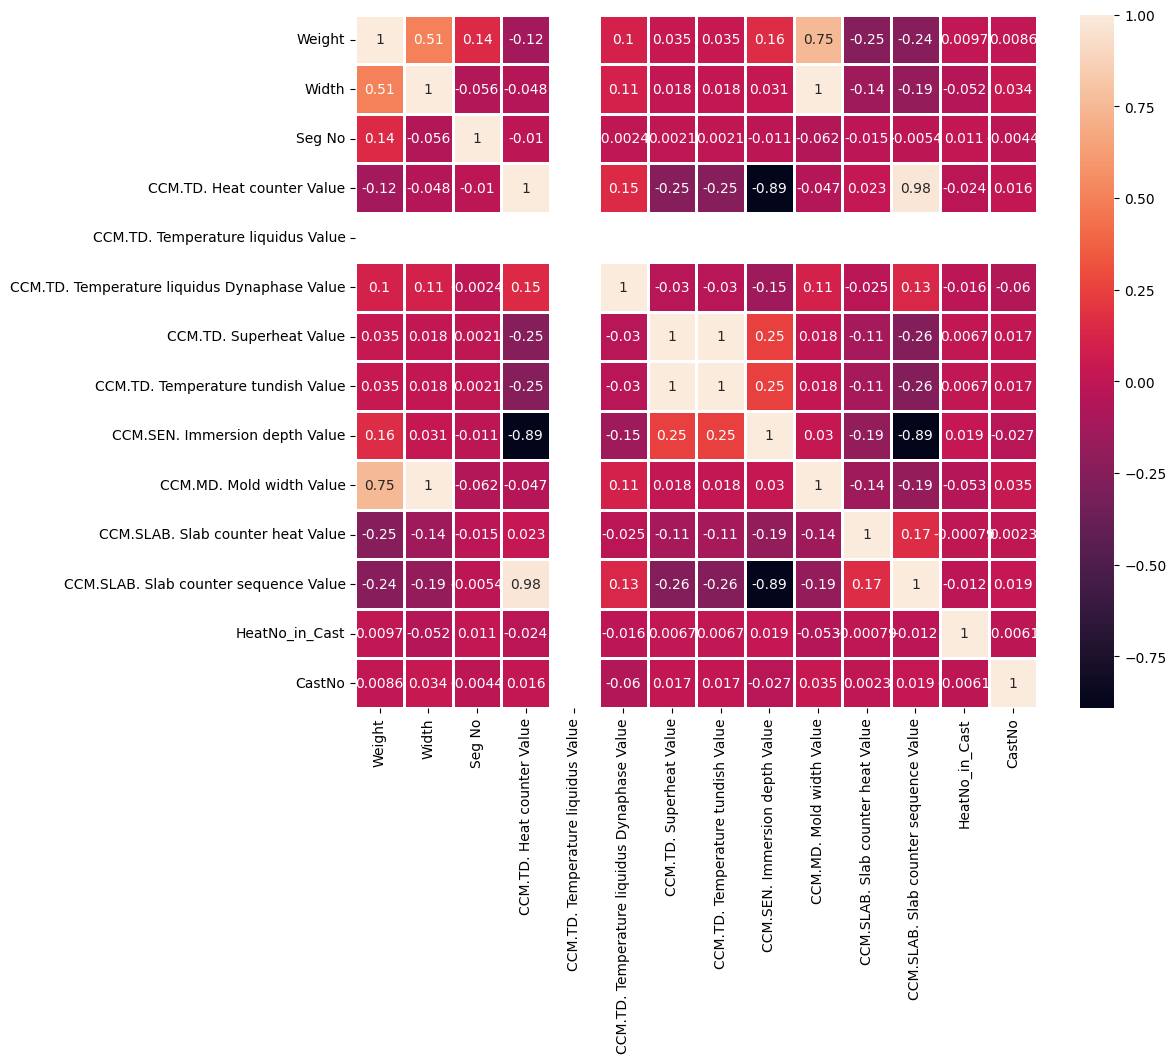

In [65]:
plt.figure(figsize=(11, 9))
sns.heatmap(data1, annot=True, linewidths=1)

In [56]:
df.isna().sum()

Material Type                                      0
End time                                           0
Route                                              0
Weight                                             0
Length                                             0
Thickness                                          0
Width                                              0
Grade                                              0
Quality Status                                     0
Seg No                                             0
Seg from                                           0
Seg to                                             0
CCM.TD. Heat counter Value                       516
CCM.TD. Temperature liquidus Value               516
CCM.TD. Temperature liquidus Dynaphase Value     516
CCM.TD. TD internals type Value                  516
CCM.TD. Slag powder Value                          0
CCM.TD. Stopper Type Value                      2287
CCM.TD. Steel weight in tundish Value         